In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

C:\Users\maxsu\AppData\Local\Temp\ipykernel_7136\1384332288.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [5]:
f = pd.read_json("C:/Users/maxsu/ultimate_challenge/logins.json")

In [7]:
f.keys()

Index(['login_time'], dtype='object')

In [10]:
print(len(f['login_time']))

93142


In [11]:
f_logins = pd.DataFrame(pd.to_datetime(f['login_time']),columns = ['login_time'])

In [12]:
f_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [13]:
#check for na values
f_logins[f_logins['login_time'].isna()].shape

(0, 1)

In [14]:
#add count column for resample
f_logins['count'] = 1
#set login time as index for resampling
f_logins.index = f_logins['login_time']
#drop redundant column
f_logins.drop('login_time',axis=1,inplace=True)
f_logins.tail()

,count
login_time,
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1
1970-04-13 18:57:38,1
1970-04-13 18:54:23,1


<Axes: xlabel='login_time'>

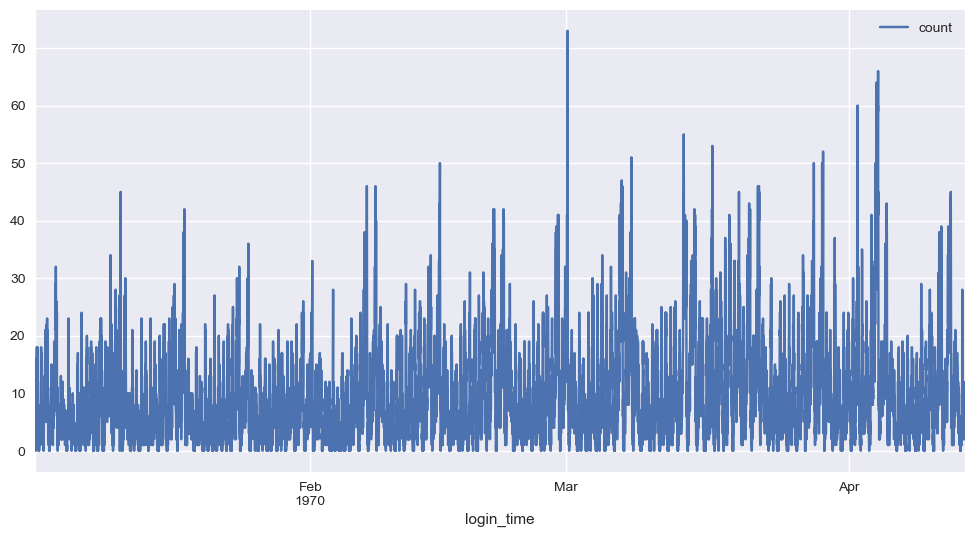

In [16]:
f_count = f_logins.resample('15min').sum()
f_count.plot(kind='line',figsize=(12,6))

In [18]:
f_count.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [19]:
#The average number of logins per 15 minutes is 7. Spikes in the data set are pulling
#up the mean

In [20]:
#create new columns for items of interest
f_count = f_count.assign(month_day=f_count.index.day)
f_count = f_count.assign(weekday=f_count.index.weekday)
f_count.head()

,count,month_day,weekday
login_time,,,
1970-01-01 20:00:00,2,1,3
1970-01-01 20:15:00,6,1,3
1970-01-01 20:30:00,9,1,3
1970-01-01 20:45:00,7,1,3
1970-01-01 21:00:00,1,1,3


In [21]:
spike = np.quantile(f_count,0.99)
f_spike = f_count[f_count['count'] >= spike]
month_days = []
weekdays = []
for date in f_spike.index:
    month_days.append(date.day)
    weekdays.append(date.weekday())
    
f_spike_days = pd.DataFrame(month_days,columns=['day'],index=range(len(month_days)))
f_spike_weekdays = pd.DataFrame(weekdays,columns=['weekday'],index=range(len(weekdays)))

In [23]:
f_spike_days.day.value_counts()[0:10]

day
21    25
4     24
22    18
15    18
28    17
7     15
8     15
14    14
29    14
3     13
Name: count, dtype: int64

In [25]:
f_spike_weekdays.weekday.value_counts()


weekday
5    104
6    103
4     48
3     15
2      7
1      7
0      2
Name: count, dtype: int64

In [26]:
#We can explain the spike in user logins on weekdays as more people use ride share apps
#to go to partier or bars on thg weekend

<Axes: xlabel='login_time'>

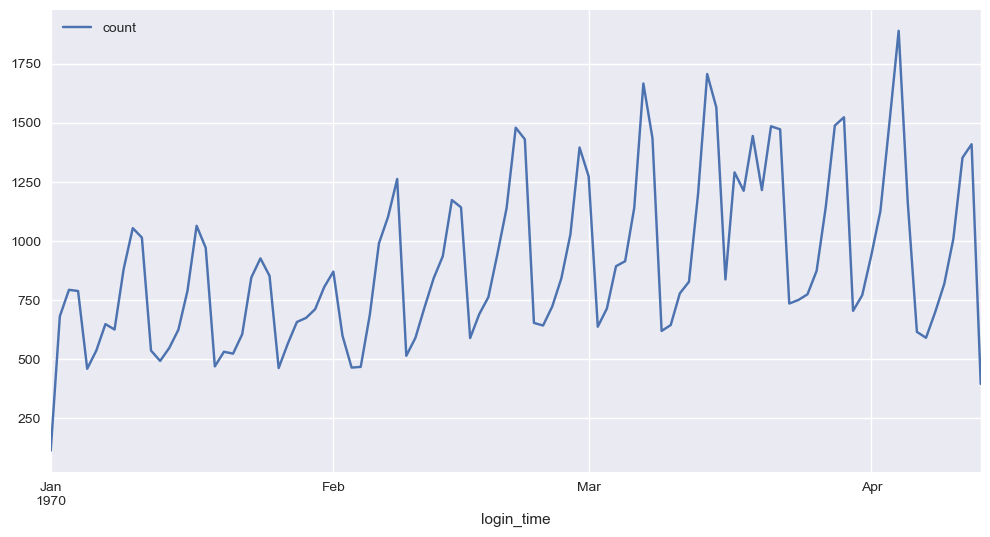

In [27]:
#Resample to daily frequency
f_day = f_logins.resample('1D').sum()
f_day.plot(kind='line',figsize=(12,6))

In [28]:
#This appears to show an increasing frequency trend foe th eaverage number of logins.

C:\Users\maxsu\anaconda3_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 28.99999999999998, 'Day')

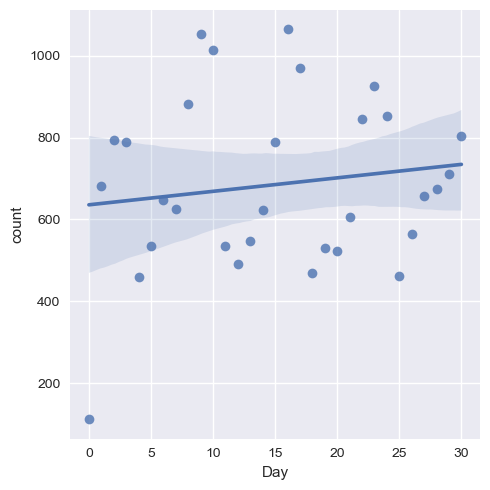

In [30]:
#Plot January trend
plot_f = f_day[f_day.index.month==1]
plot_f = plot_f.assign(x = range(plot_f.shape[0]))
sns.lmplot(data=plot_f,x='x',y='count')
plt.xlabel('Day')

C:\Users\maxsu\anaconda3_new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 28.99999999999998, 'Day')

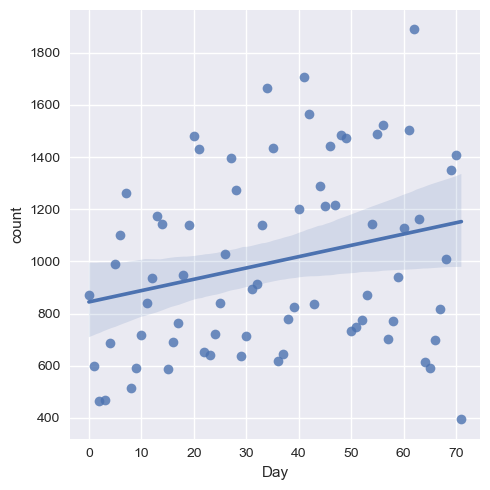

In [31]:
# We can conclude that th eupwards trend doesn't start in January from this graph due 
#to their being no clear trend either direction
#Plot Feb - April trend
plot_f = f_day[f_day.index.month!=1]
plot_f = plot_f.assign(x = range(plot_f.shape[0]))
sns.lmplot(data=plot_f,x='x',y='count')
plt.xlabel('Day')

In [32]:
#import data from json file
file = 'ultimate_data_challenge.json'
with open(file) as f:
    data = json.loads(f.read())
df = pd.DataFrame(data)

In [33]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [35]:
#Break down trip counts by percentage
df_tripcounts = df['trips_in_first_30_days'].value_counts(normalize=True)*100
df_tripcounts.head(7)

trips_in_first_30_days
0    30.780
1    28.216
2    14.804
3     7.576
4     5.124
5     3.232
6     2.268
Name: proportion, dtype: float64

In [36]:
#What percentage of drivers are retained?
np.sum(df_tripcounts[1:])

69.22

In [37]:
#Drop rows with no phone information
df = df.drop(df[df.phone.isna()==True].index,axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    41578 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49406 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [38]:
df['avg_rating_by_driver'].describe()

count    49406.000000
mean         4.777861
std          0.447114
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [39]:
df['avg_rating_of_driver'].describe()


count    41578.000000
mean         4.601467
std          0.617377
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [40]:
#Fill missing values by averaging the mean and median
fill_val = (4.777861+5) / 2
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(value=fill_val)

#Fill missing values with median value
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(value=4.9)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [42]:
#Convert to timestamp
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [44]:
#set current date 
current_date = df['last_trip_date'].max()
#Find if user qualifies as active
df['active'] = df['last_trip_date'].apply(lambda date: 0 if (current_date-date).days>30 else 1)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [45]:
#create dummy variables for categorical features
df_features = pd.get_dummies(df,columns=['city','phone','ultimate_black_user'])
df_features.head()
#set target and drop unuseful columns
target = df_features['active']
df_features = df_features.drop(['last_trip_date','signup_date','active'],axis=1)

<Axes: xlabel='active', ylabel='avg_dist'>

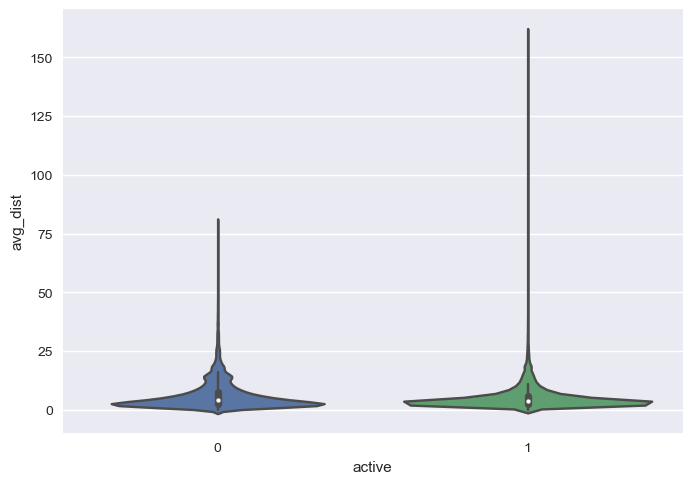

In [46]:
#visualize difference in average distance by activity of user
sns.violinplot(data=df,x='active',y='avg_dist')

In [47]:
pd.pivot_table(df,index='active',aggfunc={'avg_dist':['mean','std']})

avg_dist          
            mean       std
active                    
0       6.190725  6.184010
1       5.113930  4.617779

In [48]:
#There is a difference in the average distance per trip taken in the first 30 days 
#between active users and inactive users, this will be important for predictive modeling.
#The average rating by by driver will probably be informative, let's plot it for active vs 
#inactive users.

(3.5, 5.2)

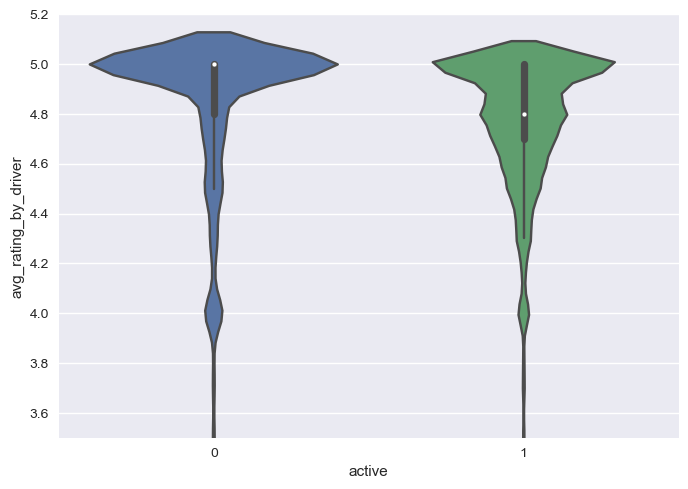

In [49]:
sns.violinplot(data=df,x='active',y='avg_rating_by_driver')
plt.ylim([3.5,5.2])

In [50]:
pd.pivot_table(df,index='active',aggfunc={'avg_rating_by_driver':['median','std']})

avg_rating_by_driver          
                     median       std
active                               
0                       5.0  0.503901
1                       4.8  0.328753

In [51]:
#Active users took more trips within the first 30 days

In [52]:
df.active.value_counts(normalize=True)*100


active
0    62.35989
1    37.64011
Name: proportion, dtype: float64

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [54]:
#scale data
scaler = QuantileTransformer()
scaled_features = scaler.fit_transform(df_features)

In [55]:
#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2,random_state=42)

In [56]:
#build random forest model with 1000 estimators
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [58]:
rf.score(X_test,y_test)

0.7501259953633707

In [59]:
print(cross_val_score(rf,X_test,np.ravel(y_test),cv=5))
print('Mean Cross Validated Score:',np.mean(cross_val_score(rf,X_test,np.ravel(y_test),cv=5)))

[0.75365239 0.74747984 0.74344758 0.74546371 0.74798387]
Mean Cross Validated Score: 0.7485129397903633


In [60]:
df_importance = pd.DataFrame(zip(list(df_features.columns),rf.feature_importances_),index=range(df_features.columns.shape[0]),columns=['feature','importance'])
df_importance.sort_values(by='importance',ascending=False)

,feature,importance
5,avg_dist,0.300703
4,weekday_pct,0.133017
6,avg_rating_by_driver,0.112358
0,trips_in_first_30_days,0.080920
1,avg_rating_of_driver,0.080741
3,surge_pct,0.079539
2,avg_surge,0.066402
8,city_King's Landing,0.047392
11,phone_iPhone,0.019796
10,phone_Android,0.019696


In [61]:
#Average distance driven, weekday percentage, and the rating given to the passenger by the 
#driver were the most important features.

In [62]:

#more metrics for our model
precision_recall_fscore_support(y_test,y_pred)

(array([0.80051688, 0.66648794]),
 array([0.79935484, 0.66809997]),
 array([0.79993544, 0.66729298]),
 array([6200, 3721], dtype=int64))

In [64]:
#weighted metrics
precision_recall_fscore_support(y_test,y_pred,average='weighted')


(0.7502475819466946, 0.7501259953633707, 0.7501861597674541, None)

In [65]:
#We will next try logistic regression tuned to the hyperparameters which
#were seen as important from our last model

In [66]:
#initialize model
logit = LogisticRegression(solver='lbfgs')
#set parameter grid
param_grid = {'C':np.arange(0.5,5.1,0.1)}
#instantiate and fit grid search object
grid = GridSearchCV(logit,param_grid,cv=5)
grid.fit(X_train,np.ravel(y_train))

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])})

In [67]:
grid.best_estimator_.C

0.9999999999999999

In [68]:
#find coefficients from Logistic Regression
logit_coef = LogisticRegression(C=grid.best_estimator_.C)
logit_coef.fit(X_train,y_train)
df_coef = pd.DataFrame(zip(list(df_features.columns),logit_coef.coef_[0]),index=range(df_features.columns.shape[0]),columns=['feature','coefficient'])
df_coef

,feature,coefficient
0,trips_in_first_30_days,0.085746
1,avg_rating_of_driver,-0.467842
2,avg_surge,1.734196
3,surge_pct,-0.665746
4,weekday_pct,-0.236958
5,avg_dist,0.164841
6,avg_rating_by_driver,-1.330364
7,city_Astapor,-0.761252
8,city_King's Landing,1.128401
9,city_Winterfell,-0.245323


In [69]:
print(np.mean(cross_val_score(grid,X_test,np.ravel(y_test),cv=5)))

0.7414574530754855


In [ ]:
#The logistic regression did not add any predictive advantage. We have achieved accuracy 
#of 75% with our models and these can be the basis of even more accurate models in the future

#weekday percentage: The chance of being an active user decrease as the percentage of week day
#use goes up. From this we can see that encouraging people to use the app on the weekend will be 
#beneficial for the company revenue. 
#average rating by driver: For this feature, there is a decreased likelihood of being an active 
#user as your rating goes up. trips in the first 30 days: As the number of trips in the first 30 
#days increases, so does the chance that a rider is active after 6 months.

#Based on these results I would incentivice the following:
#Get the clients to use the app more in the first 30 days
#Get the clients to use th eapp more on weekends
#GEt the drivers to be accurate ewith thie rratings in the app